# Reporte de Práctica 9: Pronósticos con statsmodels

En esta práctica trabajamos con valores distintos a los de las demás debido a que no se concretó la actualización de las demas prácticas y por ende, no tenemos un conjunto de datos validos para pronosticar. Así que siguiendo el ejemplo de la Dra. Elisa, busque otro conjunto de datos con suficientes registros para poder realizar un pronostico decente.

En ésta ocasión el conjunto de datos que decidí utilizar es el histórico del valor del Dolar Americano en relación al Nuevo Peso Mexicano(MXP), hago el enfasís en el Nuevo Peso ya que antes del 1° de Enero de 1993 el Peso Mexicano(MXN) tenia mil veces el valor que representaba, es decir,  1 MXP = 1000 MXN, debido a una devaluación acordada por la administración ejecutiva de México entre los años 1988 y 1994. El país atravesó una inflación muy alta heredada de los malos manejos de las anteriores administraciones. Para mitigar los costos excesivos de los productos, se acordó la eliminacion de los ultimos tres ceros de cualquier número que representara dinero. Virtualmente los productos pasaron de costar millones a costar miles.

Debido a que quiero hacer un pronostico acertado, busque todos los resgitros desde el 1° de Enero de 1993 al 8 de Abril de 2019, por la cantidad de datos que manejo decidí descargar la información en tres archivos, cada uno representa una decada, 1990's, 2000's y 2010's. Los datos fueron obtenidos del sitio web [mx.investing.com](https://mx.investing.com/currencies/usd-mxn-historical-data)

## Objetivo

Pronosticar el precio del dolar para el 9 de Abril de 2019

## Preparación de los datos

Una vez cargados los datos en nuestro repositorio, procedemos a importarlos a python3 y los ingresamos a un dataframe de pandas. reemplazamos los puntos de las fechas por espacios vacios para poder formatear la entrada de la fecha. Luego ordenamos las fechas de forma creciente. 

In [1]:
import pandas as pd
df90s = pd.read_csv('old/Pronosticos/DHUSD_MXN1990.csv')
df90s['Fecha'] = df90s['Fecha'].apply(lambda x: x.replace('.',''))
df90s['Fecha'] = pd.to_datetime(df90s['Fecha'], format='%d%m%Y')
df90s['% var.'] = df90s['% var.'].str.rstrip('%').astype('float') / 100.0
df90s = df90s.sort_values(['Fecha'])
print("90s = ",len(df90s))

#print(df90s)


df00s = pd.read_csv('old/Pronosticos/DHUSD_MXN2000.csv')
df00s['Fecha'] = df00s['Fecha'].apply(lambda x: x.replace('.',''))
df00s['Fecha'] = pd.to_datetime(df00s['Fecha'], format='%d%m%Y')
df00s['% var.'] = df00s['% var.'].str.rstrip('%').astype('float') / 100.0
df00s = df00s.sort_values(['Fecha'])
print("00s = ",len(df00s))

#print(df00s)


df10s = pd.read_csv('old/Pronosticos/DHUSD_MXN2010.csv')
df10s['Fecha'] = df10s['Fecha'].apply(lambda x: x.replace('.',''))
df10s['Fecha'] = pd.to_datetime(df10s['Fecha'], format='%d%m%Y')
df10s['% var.'] = df10s['% var.'].str.rstrip('%').astype('float') / 100.0
df10s = df10s.sort_values(['Fecha'])
print("10s = ",len(df10s))


#print(df10s)


('90s = ', 1821)
('00s = ', 2606)
('10s = ', 2463)


Una vez ordenados los datos como los necesitamos, los fusionamos en un solo dataframe, y trasnponemos esta matriz de datos, reemplazamos el nombre de las columnas con la fecha del valor, quitamos las dechas del dataframe y guardamos todos en un .csv para respaldar la informacion procesada.
Imprimimos los tipos de dato antes de la transposicion para asegurarnos de que todo quedo en el tipo de dato correcto.

In [2]:
historico = pd.concat([df90s,df00s,df10s], ignore_index=True)

print(historico.dtypes)


#historico = historico.transpose()
#historico.columns = historico.iloc[0]
#historico = historico[1:]

print(len(historico),len(historico.columns))

historico.to_csv('old/historicoUSD_MXN.csv', index=False)

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
Máximo             float64
Mínimo             float64
% var.             float64
dtype: object
(6890, 6)


Una vez ordenada la información como la necesitamos, empezamos a observar el comportamiento de los datos graficando.

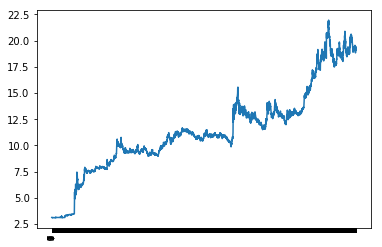

In [4]:
import matplotlib.pyplot as plt
from numpy import asarray
ejemplo = historico['Cierre']
#print(ejemplo)
x = range(len(ejemplo))
plt.plot(x, asarray(ejemplo))
plt.xticks(x, "04/01/1993", rotation='vertical',fontsize=8)
plt.show()

Ahora aplicaremos el pronostico de un paso de Holt

In [180]:
from statsmodels.tsa.api import Holt


#historico = historico.transpose()
#historico.columns = historico.iloc[0]
#historico = historico[1:]


#print(historico)
lbls = historico['Cierre']
#print(lbls)
x = range(len(lbls))
#print(x)
pronosticos = []
#for i in range(len(historico)):
y = asarray(historico['Cierre'].loc[i:])
f = Holt(asarray(y)).fit(smoothing_level = 0.1)
    #pronosticos.append(f.forecast(1))
plt.title('Pronóstico de un paso con el método de Holt', fontsize = 20)
plt.xlabel('CF 1 op verdadero', fontsize = 15)
plt.ylabel('Pronóstico', fontsize = 15)
plt.scatter(d.CF1ra, pronosticos, c = 'g', s = 50)
plt.show()

KeyboardInterrupt: 

Como tarda mucho en procesar la información pasaremos a las demás pruebas

In [250]:
historico = historico.transpose()
historico.columns = historico.iloc[0]
historico = historico[1:]
historico = historico.transpose()




Results of Dickey-Fuller Test:
Test Statistic	-1.068
p-value	0.728
#Lags Used	1.000
Number of Observations Used	6888.000
Critical Value (5%)	-2.862
Critical Value (1%)	-3.431
Critical Value (10%)	-2.567

Results of Dickey-Fuller Test:
Test Statistic	-1.070
p-value	0.727
#Lags Used	1.000
Number of Observations Used	6888.000
Critical Value (5%)	-2.862
Critical Value (1%)	-3.431
Critical Value (10%)	-2.567

Results of Dickey-Fuller Test:
Test Statistic	-1.101
p-value	0.715
#Lags Used	3.000
Number of Observations Used	6886.000
Critical Value (5%)	-2.862
Critical Value (1%)	-3.431
Critical Value (10%)	-2.567

Results of Dickey-Fuller Test:
Test Statistic	-1.013
p-value	0.749
#Lags Used	8.000
Number of Observations Used	6881.000
Critical Value (5%)	-2.862
Critical Value (1%)	-3.431
Critical Value (10%)	-2.567

Results of Dickey-Fuller Test:
Test Statistic	-19.643
p-value	0.000
#Lags Used	12.000
Number of Observations Used	6877.000
Critical Value (5%)	-2.862
Critical Value (1%)	-3.431
Criti

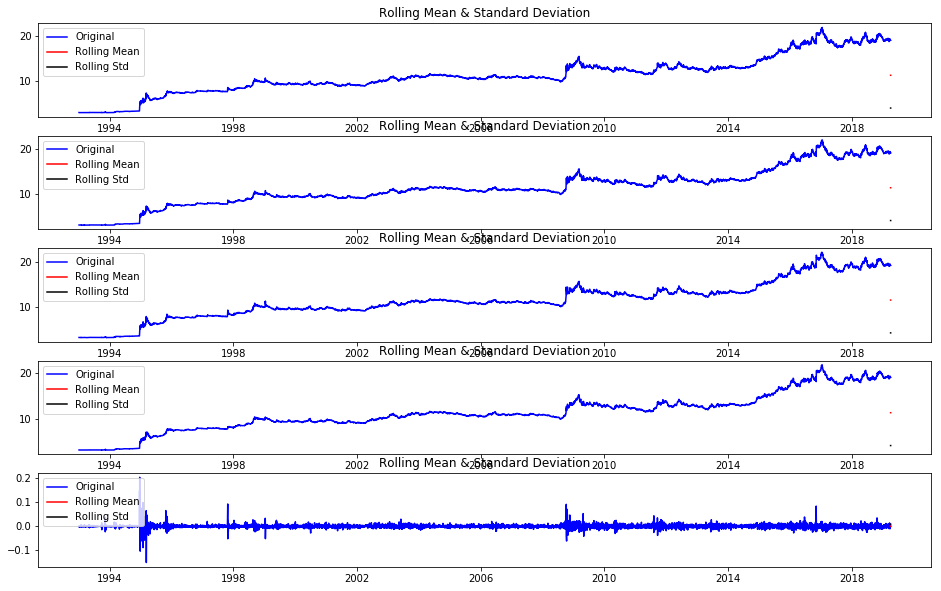

In [271]:
from statsmodels.tsa.stattools import adfuller

# rutina de https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
def test_stationarity(ts, w, r, i): 
    rolmean = ts.rolling(w).mean()
    rolstd = ts.rolling(w).std()
    plt.subplot(r, 1, i) 
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    dftest = adfuller(ts, autolag='BIC')
    #dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({:s})'.format(key)] = value
    return '\n\nResults of Dickey-Fuller Test:\n' + '\n'.join(['{:s}\t{:.3f}'.format(k, v) for (k, v) in dfoutput.items()])





plt.rcParams["figure.figsize"] = [16, 10]
f = plt.figure()     
i = 1
lvls = historico.columns
r = len(lvls)
t = ''
w = 6889
for c in lvls:
    #print(historico[c])
    t += test_stationarity(historico[c], w, r, i)
    i += 1
plt.plot()
print(t)

# Conclusión
Demasiados datos para trabajar, falta obtener p y q para pronosticar.
--08 de Abril 2019-- Luis Angel Gutierrez Rodriguez 1484412